In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [4]:
import os
print(os.getcwd())
import os

# Load the dataset
bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")

c:\Users\novee\OneDrive\Desktop\datawarehouseml\DataWareHousing_FinalProject\python_server


-----------------------------------
-------- Data exploration ---------
-----------------------------------


--------------------------
-------- Summary ---------
--------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37178 entries, 0 to 37177
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           37178 non-null  int64  
 1   EVENT_UNIQUE_ID    37178 non-null  object 
 2   PRIMARY_OFFENCE    37178 non-null  object 
 3   OCC_DATE           37178 non-null  object 
 4   OCC_YEAR           37178 non-null  int64  
 5   OCC_MONTH          37178 non-null  object 
 6   OCC_DOW            37178 non-null  object 
 7   OCC_DAY            37178 non-null  int64  
 8   OCC_DOY            37178 non-null  int64  
 9   OCC_HOUR           37178 non-null  int64  
 10  REPORT_DATE        37178 non-null  object 
 11  REPORT_YEAR        37178 non-null  int64  
 12  REPORT_MONTH       371

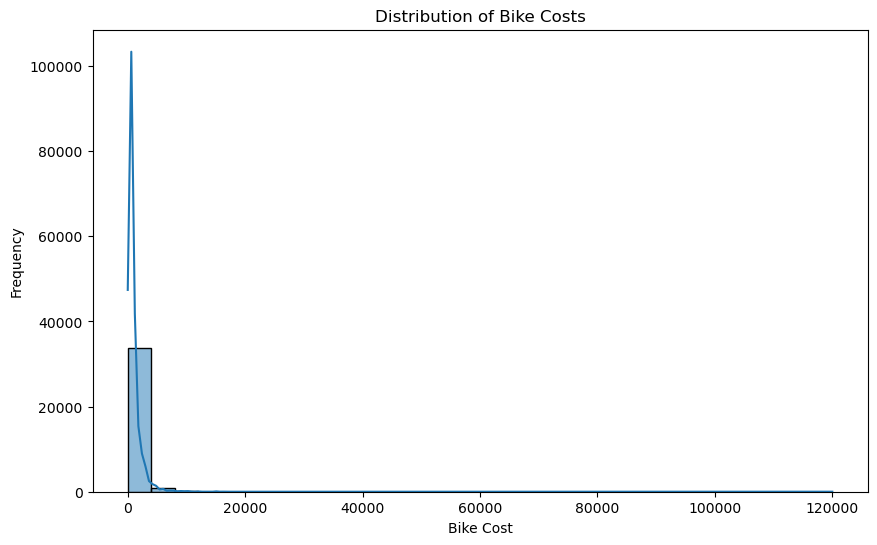


--------------------------------------
-------- Correlation heatmap ---------
--------------------------------------



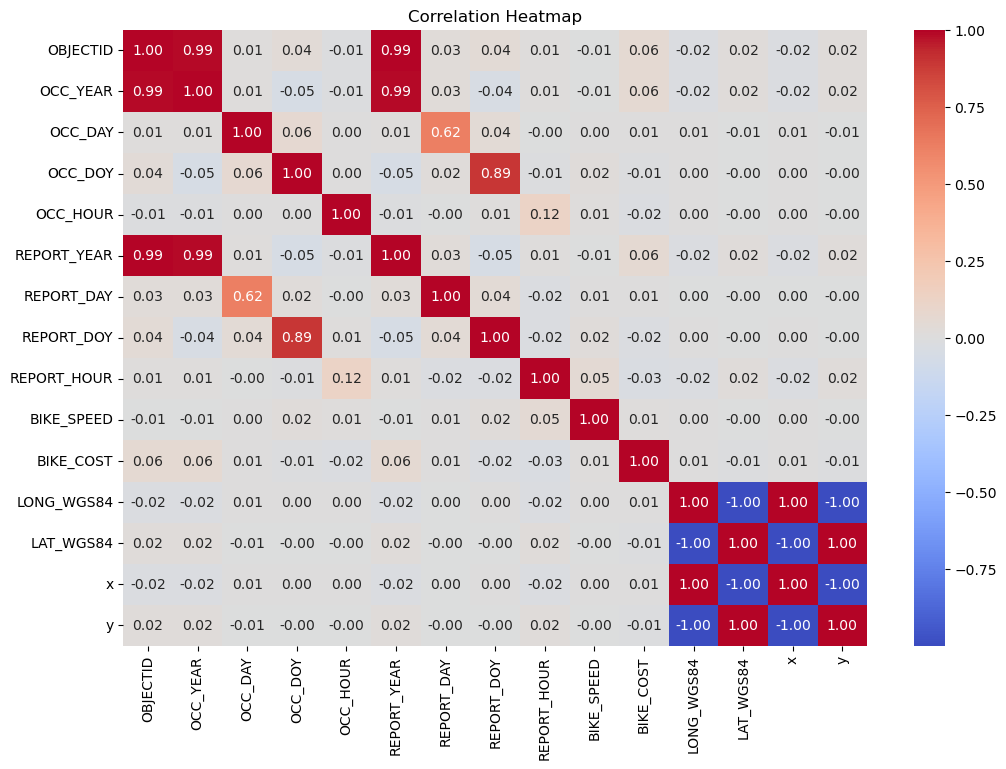


-------------------------------------------------
-------- Histogram of mean of BIKE_COST ---------
-------------------------------------------------



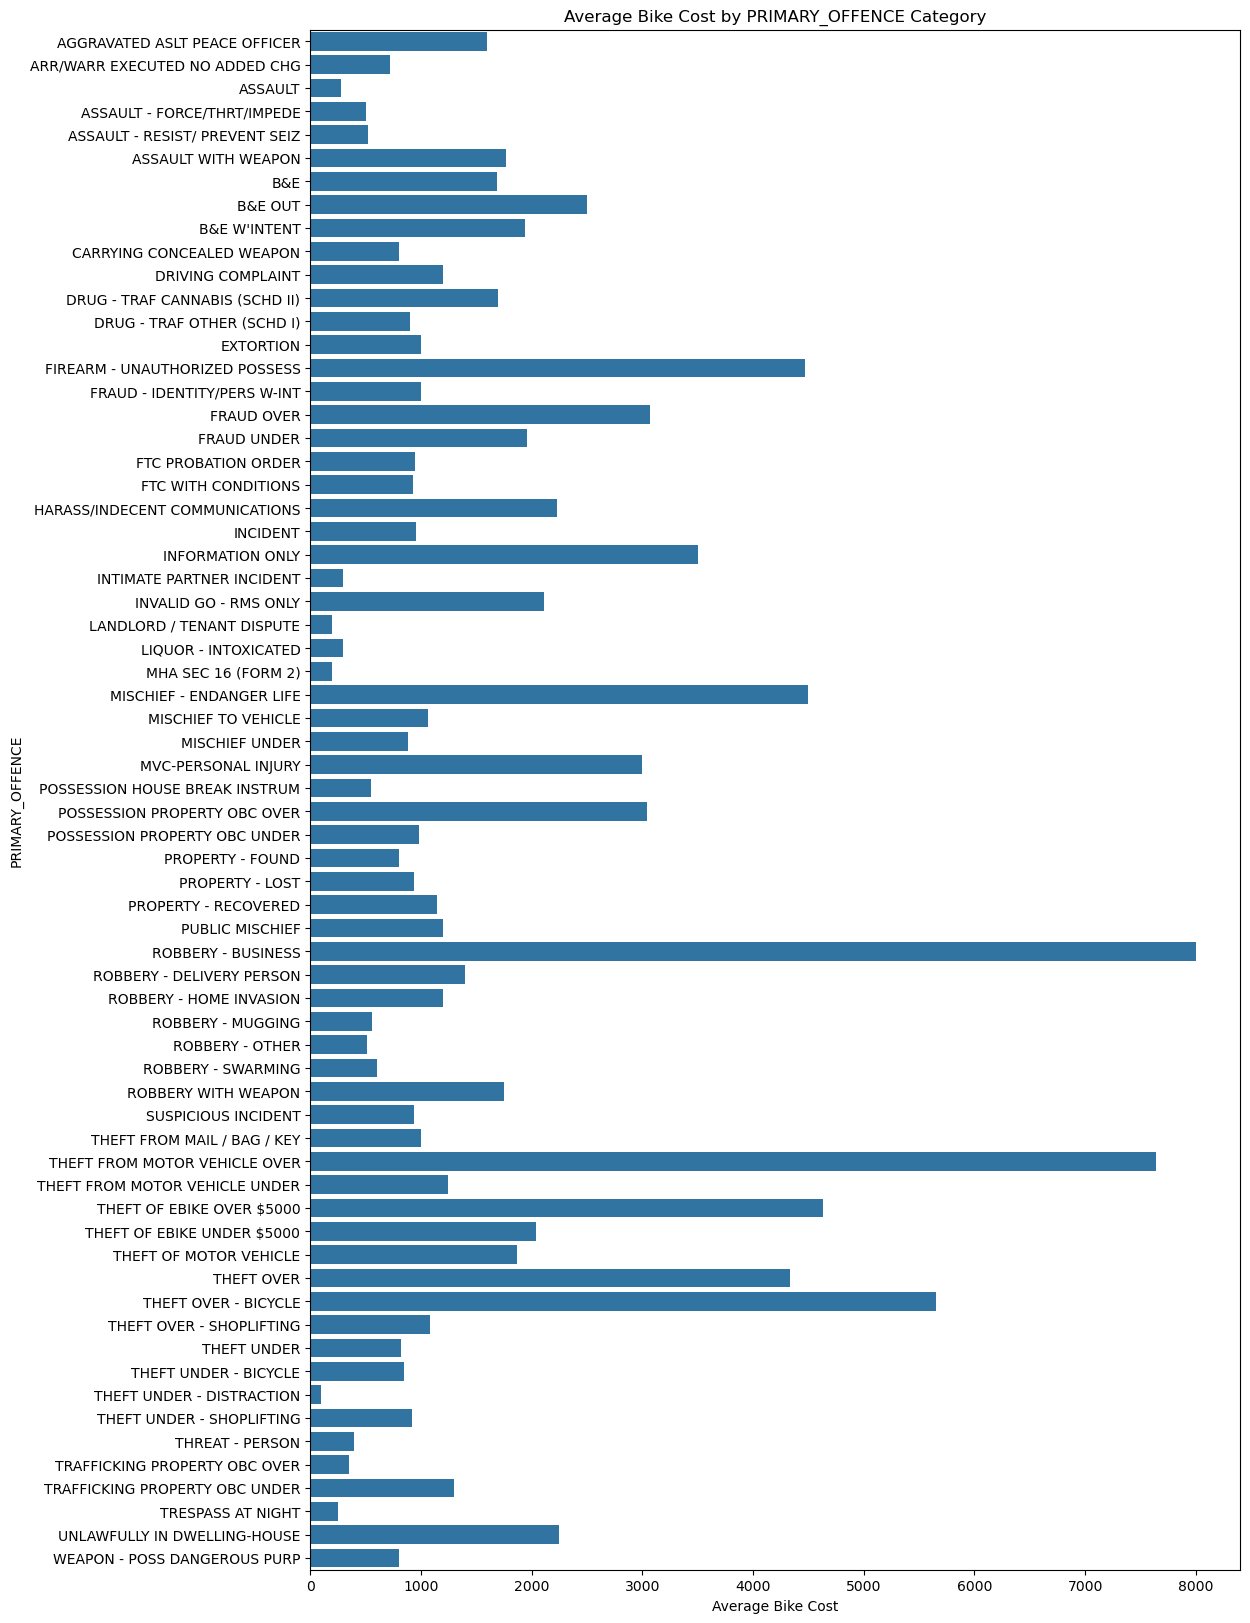

In [5]:
## 1 -  Data exploration (Benjamin Lefebvre - 301234587)

# a) Load and describe data elements (columns), provide descriptions & types, ranges and values of elements as appropriate - use pandas, numpy and any other python packages.
# b) Statistical assessments including means, averages, and correlations.
# c) Missing data evaluations
# d) Graphs and visualizations

print("-----------------------------------")
print("-------- Data exploration ---------")
print("-----------------------------------")
print("")

# Quick summary of the dataset
print("")
print("--------------------------")
print("-------- Summary ---------")
print("--------------------------")
print("")

print(bike_data.info())

# Statistical summary of the dataset
print("")
print("------------------------------------------")
print("-------- Statistical Assessments ---------")
print("------------------------------------------")
print("")

print(bike_data.describe())

# Display the first few rows of the dataset
print("")
print("---------------------------------")
print("-------- First Few Rows ---------")
print("---------------------------------")
print("")
print(bike_data.head())

# Display the data range of each column
print("")
print("-------------------------------------")
print("-------- Columns Data Range ---------")
print("-------------------------------------")
print("")
for column in bike_data.columns:
    if bike_data[column].dtype in [np.int64, np.float64]:
        min_value = bike_data[column].min()
        max_value = bike_data[column].max()
        print(f"{column}: Min: {min_value}, Max: {max_value}")
    else:
        unique_values = bike_data[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)

    print("")

# Display the data types of each column
print("")
print("------------------------------------")
print("-------- Columns Data Type ---------")
print("------------------------------------")
print("")
print(bike_data.dtypes)

# Check for missing values
print("")
print("-------------------------------")
print("-------- Missing Data ---------")
print("-------------------------------")
print("")
print(bike_data.isnull().sum())

# Select only numeric columns for correlation matrix
numeric_data = bike_data.select_dtypes(include=[np.number])

# Correlation matrix
print("")
print("-------------------------------------")
print("-------- Correlation Matrix ---------")
print("-------------------------------------")
print("")
print(numeric_data.corr())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of bike costs
print("")
print("------------------------------------------")
print("-------- Histogram of bike costs ---------")
print("------------------------------------------")
print("")
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['BIKE_COST'], bins=30, kde=True)
plt.title('Distribution of Bike Costs')
plt.xlabel('Bike Cost')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
print("")
print("--------------------------------------")
print("-------- Correlation heatmap ---------")
print("--------------------------------------")
print("")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of mean of BIKE_COST based on PRIMARY_OFFENCE
print("")
print("-------------------------------------------------")
print("-------- Histogram of mean of BIKE_COST ---------")
print("-------------------------------------------------")
print("")

# Calculate the mean BIKE_COST for each PRIMARY_OFFENCE category
mean_bike_cost_by_offence = bike_data.groupby('PRIMARY_OFFENCE')['BIKE_COST'].mean()

# Remove categories with NaN values
mean_bike_cost_by_offence = mean_bike_cost_by_offence.dropna()

plt.figure(figsize=(12, 20))
sns.barplot(x=mean_bike_cost_by_offence.values, y=mean_bike_cost_by_offence.index)
plt.title('Average Bike Cost by PRIMARY_OFFENCE Category')
plt.xlabel('Average Bike Cost')
plt.ylabel('PRIMARY_OFFENCE')
plt.show()

In [6]:
# Keep only the relevant columns
relevant_columns = [
   'OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'DIVISION', 'LOCATION_TYPE',
    'PREMISES_TYPE', 'BIKE_TYPE', 'BIKE_COST', 'STATUS',
    'NEIGHBOURHOOD_158'
]

filtered_bike_data = bike_data[relevant_columns]

# Save the modified dataset
filtered_file_path = 'Bicycle_Thefts_Filtered.csv'
filtered_bike_data.to_csv(filtered_file_path, index=False)


In [8]:
bike_dataf = pd.read_csv("Bicycle_Thefts_Filtered.csv")
bike_dataf.head().T

,0,1,2,3,4
OCC_YEAR,2014,2013,2014,2013,2013
OCC_MONTH,January,December,January,September,December
OCC_DOW,Wednesday,Thursday,Wednesday,Monday,Wednesday
DIVISION,D14,D14,D14,D14,D51
LOCATION_TYPE,"Single Home, House (Attach Garage, Cottage, Mo...",Other Commercial / Corporate Places (For Profi...,"Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)"
PREMISES_TYPE,House,Commercial,Apartment,Apartment,Apartment
BIKE_TYPE,RG,RC,MT,MT,MT
BIKE_COST,NaN,1300.0,NaN,750.0,1500.0
STATUS,RECOVERED,STOLEN,STOLEN,STOLEN,STOLEN
NEIGHBOURHOOD_158,Palmerston-Little Italy (80),Harbourfront-CityPlace (165),South Parkdale (85),Kensington-Chinatown (78),Downtown Yonge East (168)


In [9]:
bike_dataf.isnull().sum()

OCC_YEAR                0
OCC_MONTH               0
OCC_DOW                 0
DIVISION                0
LOCATION_TYPE           0
PREMISES_TYPE           0
BIKE_TYPE               0
BIKE_COST            2490
STATUS                  0
NEIGHBOURHOOD_158       0
dtype: int64

In [10]:
# Fill numerical columns with their respective mean values
numerical_columns = bike_dataf.select_dtypes(include=['int64', 'float64']).columns
bike_dataf[numerical_columns] = filtered_bike_data[numerical_columns].fillna(
    bike_dataf[numerical_columns].mean()
)

# Save the updated dataset
filled_numerical_file_path = 'Bicycle_Thefts_Filled_Numerical.csv'
filtered_bike_data.to_csv(filled_numerical_file_path, index=False)

filled_numerical_file_path


'Bicycle_Thefts_Filled_Numerical.csv'

In [11]:

# Remove rows where Status is 'UNKNOWN'
bike_dataf = bike_dataf[bike_dataf['STATUS'].fillna('').str.upper() != 'UNKNOWN']

# Fill the "BIKE_COST" column with its mean
# Fill numerical columns with their respective mean values
numerical_columns = bike_dataf.select_dtypes(include=['int64', 'float64']).columns
bike_dataf[numerical_columns] = filtered_bike_data[numerical_columns].fillna(
    bike_dataf[numerical_columns].mean()
)

# Save the updated dataset
filled_numerical_file_path = 'Bicycle_Thefts_Filled_Numerical.csv'
filtered_bike_data.to_csv(filled_numerical_file_path, index=False)

filled_numerical_file_path



'Bicycle_Thefts_Filled_Numerical.csv'

In [12]:
bike_dataf.head().T

,0,1,2,3,4
OCC_YEAR,2014,2013,2014,2013,2013
OCC_MONTH,January,December,January,September,December
OCC_DOW,Wednesday,Thursday,Wednesday,Monday,Wednesday
DIVISION,D14,D14,D14,D14,D51
LOCATION_TYPE,"Single Home, House (Attach Garage, Cottage, Mo...",Other Commercial / Corporate Places (For Profi...,"Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)"
PREMISES_TYPE,House,Commercial,Apartment,Apartment,Apartment
BIKE_TYPE,RG,RC,MT,MT,MT
BIKE_COST,999.776002,1300.0,999.776002,750.0,1500.0
STATUS,RECOVERED,STOLEN,STOLEN,STOLEN,STOLEN
NEIGHBOURHOOD_158,Palmerston-Little Italy (80),Harbourfront-CityPlace (165),South Parkdale (85),Kensington-Chinatown (78),Downtown Yonge East (168)


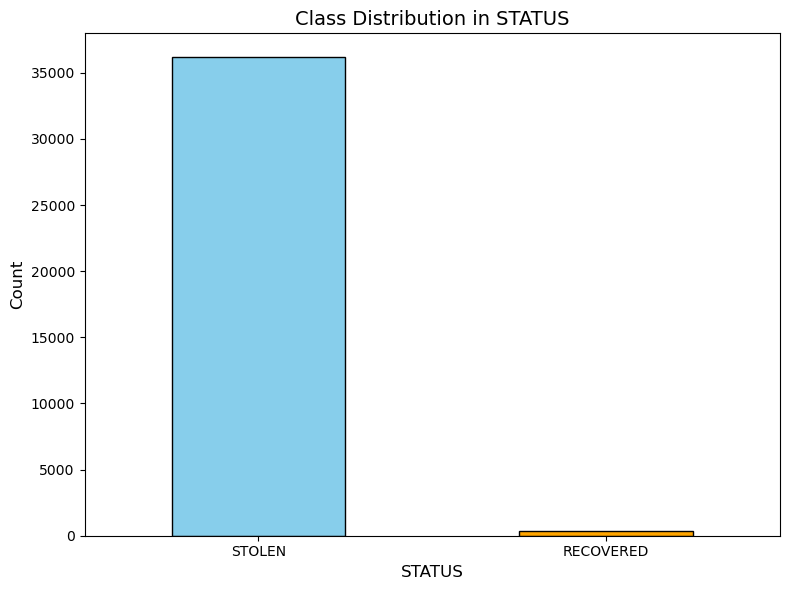

In [13]:
# Plot the class distribution graphically
class_distribution = bike_dataf['STATUS'].value_counts()
# Create a bar plot
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

# Add labels and title
plt.title('Class Distribution in STATUS', fontsize=14)
plt.xlabel('STATUS', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features in bike_dataf
encoded_bike_dataf = bike_dataf.copy()

# Identify categorical columns
categorical_columns = encoded_bike_dataf.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    encoded_bike_dataf[col] = encoder.fit_transform(encoded_bike_dataf[col].astype(str))
    label_encoders[col] = encoder  # Store the encoder for potential inverse transformation

# Verify the encoded dataset
encoded_bike_dataf.head()

,OCC_YEAR,OCC_MONTH,OCC_DOW,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_TYPE,BIKE_COST,STATUS,NEIGHBOURHOOD_158
0,2014,4,6,3,35,3,7,999.776002,0,109
1,2013,2,4,3,19,1,5,1300.000000,1,57
2,2014,4,6,3,0,0,3,999.776002,1,124
3,2013,11,1,3,0,0,3,750.000000,1,74
4,2013,2,6,12,0,0,3,1500.000000,1,36


In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the encoded dataset
numerical_columns = encoded_bike_dataf.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(encoded_bike_dataf[numerical_columns])

# Create a DataFrame for scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns, index=encoded_bike_dataf.index)

# Replace numerical columns in the original dataset with scaled values
scaled_bike_dataf = encoded_bike_dataf.copy()
scaled_bike_dataf[numerical_columns] = scaled_numerical_df

# Verify the scaled dataset
scaled_bike_dataf.head()

,OCC_YEAR,OCC_MONTH,OCC_DOW,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_TYPE,BIKE_COST,STATUS,NEIGHBOURHOOD_158
0,-1.581806,4,6,3,35,3,7,0.000011,0,109
1,-1.916361,2,4,3,19,1,5,0.193716,1,57
2,-1.581806,4,6,3,0,0,3,0.000011,1,124
3,-1.916361,11,1,3,0,0,3,-0.161146,1,74
4,-1.916361,2,6,12,0,0,3,0.322757,1,36


In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = scaled_bike_dataf.drop('STATUS', axis=1)
y = scaled_bike_dataf['STATUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a model on oversampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate for SMOTE
y_pred_smote = model_smote.predict(X_test)
print("=== SMOTE (Oversampling Minority) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1]))

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Train a model on undersampled data
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)

# Predict and evaluate for undersampling
y_pred_under = model_under.predict(X_test)
print("\n=== Undersampling (Majority Class Reduced) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_under))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_under))
print("ROC AUC Score:", roc_auc_score(y_test, model_under.predict_proba(X_test)[:, 1]))

=== SMOTE (Oversampling Minority) ===
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.12      0.15        78
           1       0.99      1.00      0.99      7236

    accuracy                           0.99      7314
   macro avg       0.60      0.56      0.57      7314
weighted avg       0.98      0.99      0.98      7314

Confusion Matrix:
 [[   9   69]
 [  36 7200]]
ROC AUC Score: 0.6154820626213662

=== Undersampling (Majority Class Reduced) ===
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.58      0.04        78
           1       0.99      0.68      0.81      7236

    accuracy                           0.68      7314
   macro avg       0.51      0.63      0.42      7314
weighted avg       0.98      0.68      0.80      7314

Confusion Matrix:
 [[  45   33]
 [2310 4926]]
ROC AUC Score: 0.6808957350002126



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1645
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1661
   macro avg       0.50      0.50      0.50      1661
weighted avg       0.98      0.99      0.99      1661



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1645
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1661
   macro avg       0.50      0.50      0.50      1661
weighted avg       0.98      0.99      0.98      1661



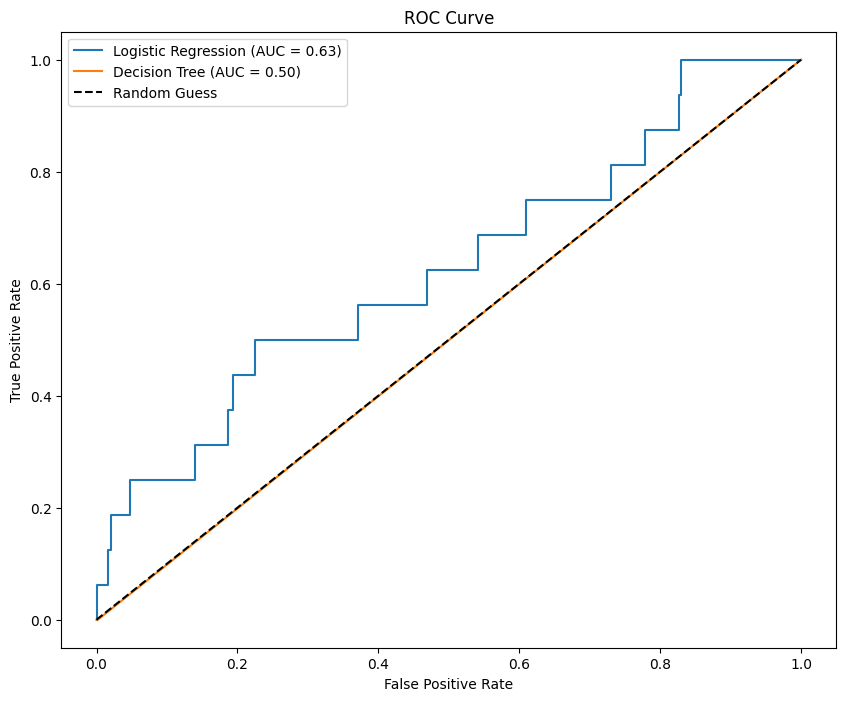


Best model based on F1-Score: Logistic Regression


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

## 4 - Model scoring and evaluation
df = pd.read_csv('Bicycle_Thefts_Open_Data.csv')
df = df.sample(n=10000, random_state=42)

df = df.dropna()  # Drop missing values for simplicity
X = df.drop(columns=['STATUS'])  
y = df['STATUS'] 

# Convert the target variable to binary (0 for 'STOLEN', 1 for 'RECOVERED')
y = (y == 'RECOVERED').astype(int)

# Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply scaling
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', class_weight='balanced')
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train_smote_scaled, y_train_smote)

# Decision Tree
tree_clf = DecisionTreeClassifier(class_weight='balanced')
tree_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree_cv = GridSearchCV(tree_clf, tree_params, cv=5, scoring='accuracy')
tree_cv.fit(X_train_smote_scaled, y_train_smote)


# Step 4: Evaluate models
models = {
    "Logistic Regression": log_reg_cv.best_estimator_,
    "Decision Tree": tree_cv.best_estimator_
}

results = {}
plt.figure(figsize=(10, 8))  # For ROC curve plotting

for model_name, model in models.items():
    # Predict using the appropriate scaled or unscaled data
    X_test_input = X_test_scaled if model_name == "Logistic Regression" else X_test
    y_pred = model.predict(X_test_input)
    y_proba = model.predict_proba(X_test_input)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": confusion
    }

    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 5: Recommend best model
best_model = max(results, key=lambda k: results[k]['F1-Score'])
print(f"\nBest model based on F1-Score: {best_model}")

In [8]:
## 5 - Deploying the model (Benjamin Lefebvre - 301234587)

# a) Using a flask framework arrange to turn your selected machine-learning model into an API.
# b) Using the pickle module, arrange for Serialization & Deserialization of your model.

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Save the model


# Load the model


# API Routes
# Get options of the location names in the dataset ,the bike_type,the bike cost ,premises, neighbourhood
@app.route('/options', methods=['GET'])
def get_options():
    options = {
        'DIVISION': bike_data['DIVISION'].unique().tolist(),
        'LOCATION_TYPE': bike_data['LOCATION_TYPE'].unique().tolist(),
        'PREMISES_TYPE': bike_data['PREMISES_TYPE'].unique().tolist(),
        'NEIGHBOURHOOD_158': bike_data['NEIGHBOURHOOD_158'].unique().tolist(),
    }
    return jsonify(options)

# Predict the status of a bike theft
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    
    # Convert the input data into a DataFrame
    input_data = pd.DataFrame(data, index=[0])
    
    # Preprocess the input data
    input_data = preprocessor.preprocess(input_data)
    
    # Make predictions
    prediction = modeler.best_model.predict(input_data)
    
    return jsonify({'prediction': prediction[0]})

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelapp

SystemExit: 1

/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
